In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mp
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')
plt.style.use ('ggplot')
from matplotlib.pyplot import figure
mp.rcParams['figure.figsize'] = (10,6)

In [3]:
os.getcwd()

'C:\\Users\\Lawalson\\Desktop\\ustacky\\projects'

In [4]:
extensions=glob.glob("*.csv")

In [5]:
extensions

['adult.data.csv',
 'base_submission.csv',
 'ds_salaries.csv',
 'epa-sea-level.csv',
 'fcc-forum-pageviews.csv',
 'final_project.csv',
 'gender_submission.csv',
 'medical_examination.csv',
 'new_project_data.csv',
 'population_total.csv',
 'test.csv',
 'train.csv',
 'world_population.csv']

In [3]:
df=pd.read_csv('ds_salaries.csv')

In [7]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [51]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,607,4,Senior-level,280
employment_type,607,4,Full-time,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
remote_ratio,607,3,Remote,381
company_location,607,50,US,355
company_size,607,3,Medium,326


In [4]:
df.drop(['Unnamed: 0','salary','salary_currency'],axis=1, inplace=True)

In [22]:
cat_columns=[col for col in df.columns if df[col].dtype=="object"]

In [23]:
cat_columns

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [24]:
columns=['experience_level','employment_type','remote_ratio','company_size']

In [25]:
unique={col: df[col].unique() for col in columns}
unique

{'experience_level': array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 'remote_ratio': array([  0,  50, 100], dtype=int64),
 'company_size': array(['L', 'S', 'M'], dtype=object)}

In [5]:
df['experience_level'].replace({"MI":"Mid-level","SE":"Senior-level","EX":"Executive-level","EN":"Entry-level"},inplace=True)
df['employment_type'].replace({"FT":"Full-time","CT":"Contract","PT":"Part-time","FL":"Freelance"},inplace= True)
df['company_size'].replace({"S":"Small","L":"Large","M":"Medium"},inplace= True)
df['remote_ratio'].replace({0 :"Onsite",50:"Hybrid",100:"Remote"},inplace= True)

In [29]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,Onsite,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,Onsite,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,Onsite,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [ ]:
def full_time (df,x,y):
    return corr=df1.groupby(by=['x','y']).size()

## Single column analysis

<AxesSubplot:xlabel='experience_level', ylabel='count'>

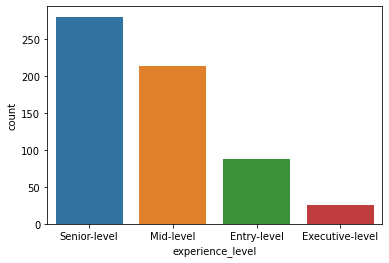

In [33]:
order=df['experience_level'].value_counts()
sns.countplot(data=df, x='experience_level', order=order.index)

In [220]:
staff=df['job_title'].value_counts()[:10]
staff=staff.reset_index()
staff.set_index('index', inplace=True)
staffss = df[df['job_title'].isin(staff.index)]
order=staffss['job_title'].value_counts().index

<AxesSubplot:xlabel='count', ylabel='job_title'>

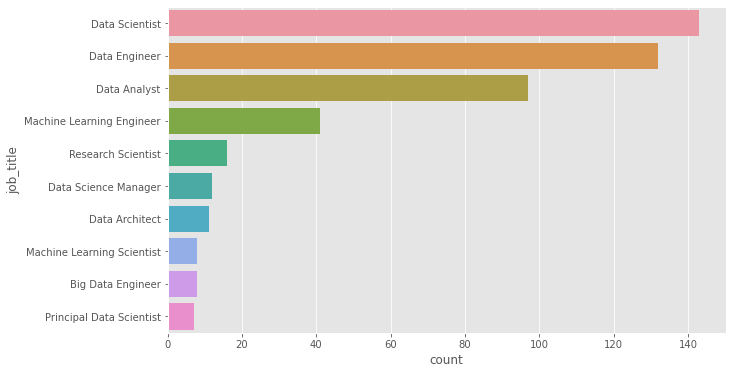

In [221]:
sns.countplot(data=staffss, y='job_title', order=order)

<AxesSubplot:xlabel='employment_type', ylabel='count'>

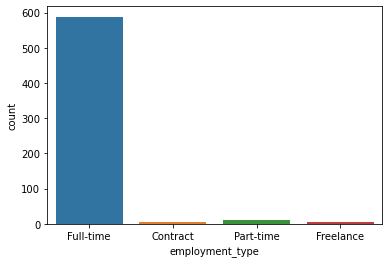

In [62]:
sns.countplot(data=df, x='employment_type')

Text(0.5, 1.0, 'Remote ratio')

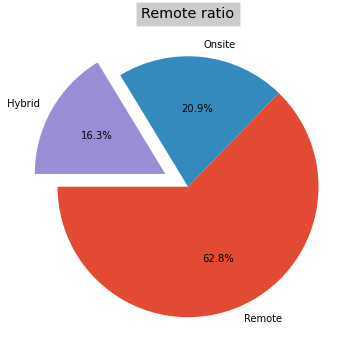

In [219]:
remote=df['remote_ratio'].value_counts()
plt.pie(remote.values, labels=remote.index, autopct='%0.1f%%',radius=1.0, startangle=180, explode=[0,0,0.2])
plt.title('Remote ratio', weight='bold')
plt.title("Remote ratio", bbox={'facecolor':'0.8', 'pad':5})

## Double column analysis

In [217]:
remote= df.groupby(['remote_ratio','work_year']).size()
remote=remote.reset_index().rename(columns={0:'counts'})

<AxesSubplot:xlabel='work_year', ylabel='counts'>

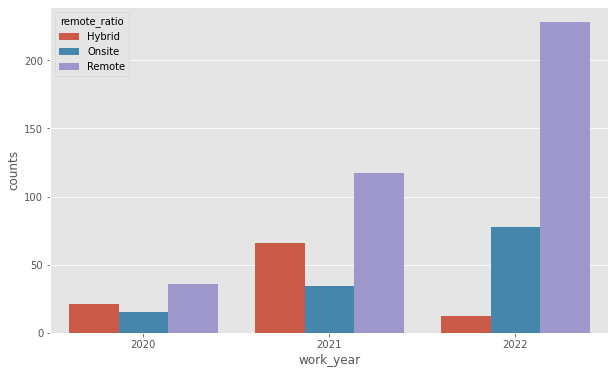

In [218]:
sns.barplot(data=remote, x='work_year',y='counts',hue='remote_ratio')



As expected there is a rapid growth in workers opting to work remotely

lets see if it affects their salary

In [76]:
rate=df.groupby(['remote_ratio','salary_in_usd']).size()
rate=rate.reset_index().rename(columns={0:'count'})

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

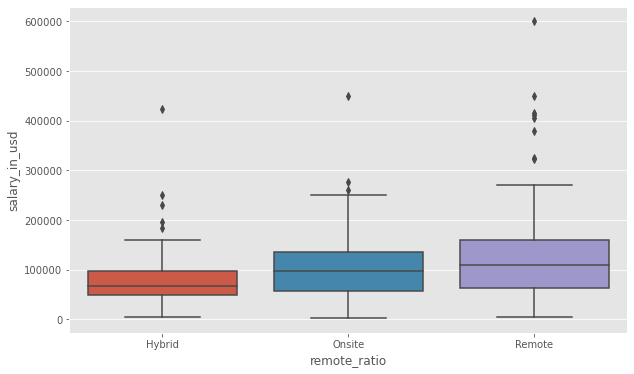

In [213]:
sns.boxplot(data=rate,x='remote_ratio',y='salary_in_usd')

with this chart we can see the salary is even higher for remote staffs

lets check for the growth of companies that need data related specialist

In [83]:
growth=df.groupby(['work_year','company_size']).size()
growth=growth.reset_index().rename(columns={0:'count'})

<AxesSubplot:xlabel='work_year', ylabel='count'>

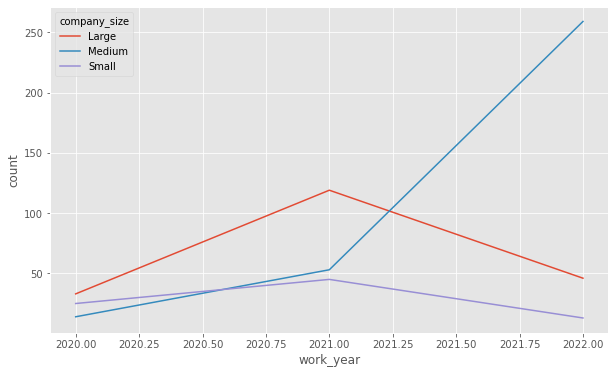

In [212]:
sns.lineplot(data=growth, x='work_year', y='count',hue='company_size')

this plot shows the growth of well funded  medium companies, and the decline of small start ups and big companies

lets check for which positions are mostly employed in regards to the size of the companies

In [184]:
rat=df.groupby(['company_size','job_title']).size()
rat=rat.reset_index().rename(columns={0:'counts'}).sort_values('counts',ascending=False)[:10]
rat.set_index('job_title')

<AxesSubplot:xlabel='job_title', ylabel='counts'>

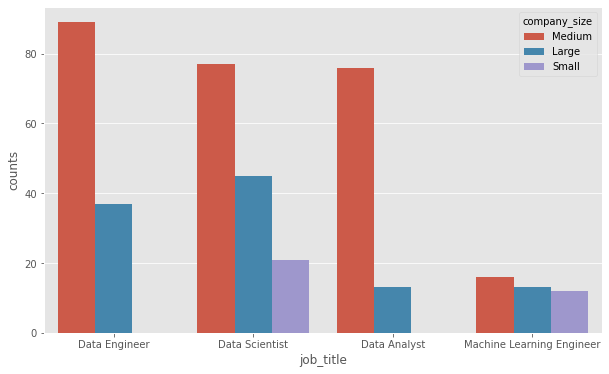

In [211]:
sns.barplot(data=rat, x='job_title',hue='company_size',y='counts')


with this we can say the most prevalent job title in various company size is Data science

In [98]:
title=df.groupby(['job_title','salary_in_usd']).size()
title=title.reset_index().rename(columns={0:'counts'}).sort_values('salary_in_usd', ascending=False)
title=title.drop('counts', axis=1)[:10]

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

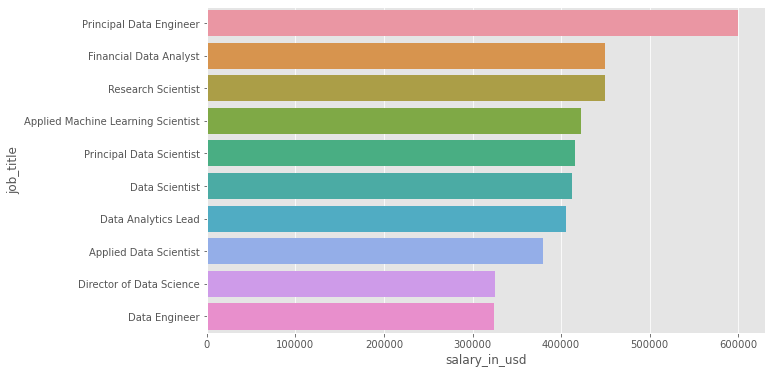

In [214]:
sns.barplot(data=title, y='job_title', x='salary_in_usd')

In [ ]:
gen=df.groupby('company_location')['employee_residence'].count()
gen=gen.reset_index().nlargest(6, 'employee_residence')

<AxesSubplot:xlabel='company_location', ylabel='employee_residence'>

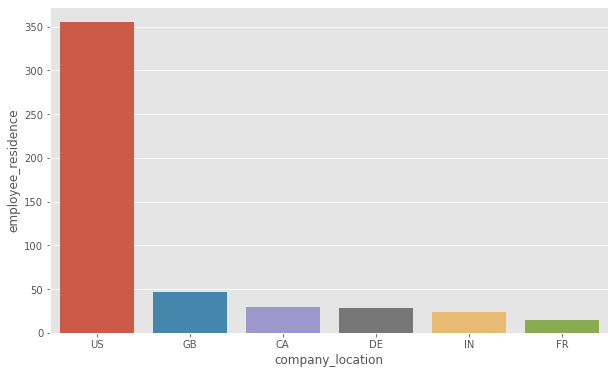

In [215]:
sns.barplot(data=gen,x='company_location',y='employee_residence')

majority of the staffs and company are situated in US

In [226]:
job_loc=df.groupby(['company_location','job_title']).size()

In [233]:
job_loc=job_loc.reset_index().rename(columns={0:'count'}).sort_values('count', ascending= False)[:10]

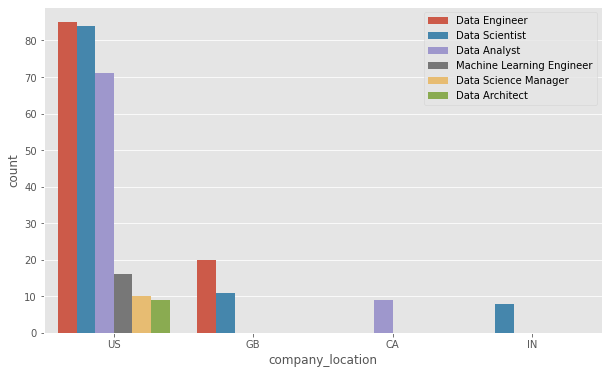

In [235]:
sns.barplot(data=job_loc,x='company_location',y='count', hue='job_title')
plt.legend(loc=1)

US is really the technological hub for all data spacialist

In [36]:
final=df.groupby(['experience_level','salary_in_usd','job_title']).size()

In [37]:
fog

experience_level  salary_in_usd  job_title              
Entry-level       4000           Data Scientist             1
                  5707           Data Science Consultant    1
                  5882           Big Data Engineer          1
                  6072           Data Analyst               1
                  9272           BI Data Analyst            1
                                                           ..
Senior-level      266400         Data Architect             1
                  276000         Lead Data Engineer         1
                  380000         Applied Data Scientist     1
                  405000         Data Analytics Lead        1
                  412000         Data Scientist             1
Length: 527, dtype: int64

In [38]:
fog=fog.reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)

In [58]:
fog=fog[:100]

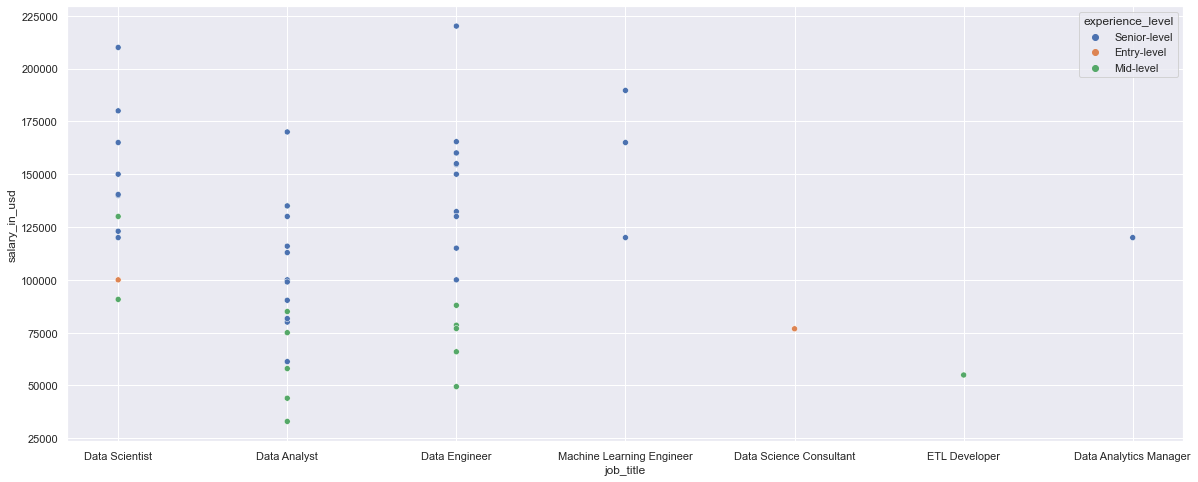

In [59]:
sns.scatterplot(data=fog, x='job_title', y='salary_in_usd',hue='experience_level')
sns.set(rc = {'figure.figsize':(20,8)})

In [60]:
Exec=df.query('experience_level=="Executive-level"')

In [66]:
Exec.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,26.0,NaN,NaN,NaN,2021.423077,0.643309,2020.0,2021.0,2021.5,2022.0,2022.0
experience_level,26,1,Executive-level,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,26,2,Full-time,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,26,13,Director of Data Science,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,26.0,NaN,NaN,NaN,199392.038462,117071.255697,69741.0,130006.5,171437.5,233750.0,600000.0
employee_residence,26,8,US,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,26,3,Remote,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,26,7,US,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,26,3,Medium,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
Exec

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,Executive-level,Full-time,Director of Data Science,325000,US,Remote,US,Large
41,2020,Executive-level,Full-time,Data Engineering Manager,79833,ES,Hybrid,ES,Large
73,2021,Executive-level,Full-time,BI Data Analyst,150000,IN,Remote,US,Large
74,2021,Executive-level,Full-time,Head of Data,235000,US,Remote,US,Large
84,2021,Executive-level,Full-time,Director of Data Science,153667,IT,Remote,PL,Large
160,2021,Executive-level,Full-time,Head of Data,230000,RU,Hybrid,RU,Large
161,2021,Executive-level,Full-time,Head of Data Science,85000,RU,Onsite,RU,Medium
164,2021,Executive-level,Full-time,Director of Data Science,130026,DE,Hybrid,DE,Medium
167,2021,Executive-level,Full-time,Director of Data Science,250000,US,Onsite,US,Large
187,2021,Executive-level,Full-time,Data Science Consultant,69741,FR,Remote,ES,Small
